# Exercise Sheet 5 Solutions – Parsing

# Learning Objectives

In this lab we're going to learn:
- to represent the structure of sentences using syntax trees;
- to use NLTK CFG parser;
- to use NLTK dependency parser;
- the difference between constituency parsing and dependency parsing.

### For Mac users
To run the notebook locally, execute te following cell.

In [ ]:
!brew install ghostscript

Running `brew update --auto-update`...
To reinstall 10.0.0, run:
  brew reinstall ghostscript


### For Linux users
To run the notebook locally, execute te following cells.

In [ ]:
# CREATE VIRTUAL DISPLAY
!apt install ghostscript python3-tk

# Install X Virtual Frame Buffer
!apt-get install -y xvfb 

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

zsh:1: command not found: apt-get


In [ ]:
### CREATE VIRTUAL DISPLAY ###
import os

# create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    
os.environ['DISPLAY']=':1.0'

### For everyone

In [3]:
# Installing Berkeley Neural Parser
!pip install benepar

# Requirement to display trees
!pip install svgling

# Uncomment the next lines if you're running the code on your local machine

# !pip install -U spacy
# !python -m spacy download en_core_web_sm
# !pip install tensorflow==1.15.0
# !pip install -U transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 7.0 MB/s 
     |████████████████████████████████| 4.9 MB 44.8 MB/s 
     |████████████████████████████████| 1.3 MB 53.2 MB/s 
     |████████████████████████████████| 163 kB 65.5 MB/s 
     |████████████████████████████████| 6.6 MB 52.0 MB/s 
  Created wheel for benepar: filename=benepar-0.2.0-py3-none-any.whl size=37647 sha256=e6956de03572a8d36ccdff6a31438e3c9035028a0a2d60218c46945761421152
  Stored in directory: /root/.cache/pip/wheels/dc/6f/a3/4d27ce92766bdedd2cbbbedb8857fb7a53534331191cda4994
Successfully built benepar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 2.4 MB/s 


# Syntax Trees

The structure of a sentence  can be represented with **syntax trees**, or **parse trees**. NLTK’s `tree` module implements the `Tree` class. It consists of a node value (typically a string label) and a Python iterable structure containing the node’s children. The iterable can be any Python iterable except for a string, but it is typically a list. The node’s children can be of any type, but they are typically leaf labels (i.e. strings) or `Tree` objects.


In [4]:
import nltk
from nltk.tree import *
from nltk.draw.tree import TreeView
%matplotlib inline
import IPython

In [5]:
import benepar, spacy
benepar.download('benepar_en3')

nlp = spacy.load('en_core_web_sm')
if spacy.__version__.startswith('2'):
    nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))
else:
    nlp.add_pipe("benepar", config={"model": "benepar_en3"})

[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Unzipping models/benepar_en3.zip.


In [ ]:
t = Tree('S', [Tree('PRP',['We']), Tree('VBD', ['saw']),
                Tree('NP', [Tree('DT',['the']), Tree('JJ',['yellow']), Tree('NN',['dog'])]) ])

# Bracket notation
print(t)

# This does not work with Google Colab, but only locally
# A picture of a tree will open in a separate window
# print(t.draw())

# Prints the label of the root tree
print(t.label())

# Prints the first subtree of the root tree
print (list(i for i in t.subtrees())[1])

(S (PRP We) (VBD saw) (NP (DT the) (JJ yellow) (NN dog)))
S
(PRP We)


/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


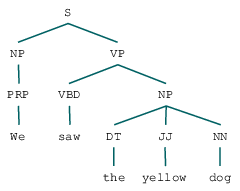

In [ ]:
# Another way to parse a sentence display the tree diagram
from spacy import displacy

def constituency_parse(text):
    tree = Tree.fromstring(list(nlp(text).sents)[0]._.parse_string)
    IPython.core.display.display(tree)

constituency_parse("We saw the yellow dog")

### Exercise 1

Draw syntax trees of the two sentences below using NLTK.

1. "The student loved his NLP assignment."

2. "The big yellow book."


In [6]:
# YOUR CODE HERE

# Sentence 1
t = Tree('S', [Tree('NP', [Tree('DT',['The']),Tree('NN',['student'])]), Tree('VP', [Tree('VBD',['loved']), 
               Tree('NP', [Tree('DT',['his']),Tree('JJ',['NLP']),Tree('NN',['assignment'])])])])

print(t)

# This does not work with Google Colab, but only locally
# print(t.draw())

# prints the first subtree of the root tree
print (list(i for i in t.subtrees())[1])


(S
  (NP (DT The) (NN student))
  (VP (VBD loved) (NP (DT his) (JJ NLP) (NN assignment))))
(NP (DT The) (NN student))


You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/Users/oksder/opt/anaconda3/lib/python3.7/site-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


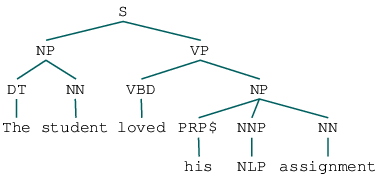

In [ ]:
# Display the tree diagram for Sentence 1
def constituency_parse(text):
    tree = Tree.fromstring(list(nlp(text).sents)[0]._.parse_string)
    IPython.core.display.display(tree)

constituency_parse("The student loved his NLP assignment")

In [ ]:
# Sentence 2

t = Tree('NP', [Tree('DT',['the']),Tree('JJ',['big']),Tree('JJ',['yellow']),Tree('NN',['book'])])

print(t)

# This does not work with Google Colab, but only locally
# print(t.draw())

(NP (DT the) (JJ big) (JJ yellow) (NN book))


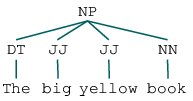

In [ ]:
# Display the tree diagram for Sentence 2
def constituency_parse(text):
    tree = Tree.fromstring(list(nlp(text).sents)[0]._.parse_string)
    IPython.core.display.display(tree)

constituency_parse("The big yellow book")

# Constituency vs Dependency Parsing

**Syntactic parsing** is the task of analyzing the syntactic structure of a sentence. There are 2 major formalisms behind it in NLP:
1. Constituency grammar / GFG
2. Dependency grammar

### Constituency grammar 

A **context-free grammar (CFG)** is concerned with how words and sequences of words combine to form **constituents**. Modelling a syntactic structure on context-free grammar is known as **constituency parsing**. For this, we use a set of terminal and non-terminal symbols together with production rules to represent the constituents of a given sentence as shown in *Figure 1*. However, constituency parsing cannot handle lexical dependencies. Possible solution to this is using **probabilistic context-free grammar (PCFG)** or **dependency grammar**.

![CFG.png](https://i.pinimg.com/originals/a6/68/50/a668505fbc3f63178614d680289939d6.png)

*Figure 1: A constituency syntax tree*

#### Available tools

- <a href="https://github.com/nikitakit/self-attentive-parser">Berkeley Neural Parser</a>

### Dependency Grammar

**Dependency Grammar** is represented as a set of binary relations between words in a sentence. Each link has a label and forms an acyclic structure as shown in *Figure 2*.

![dependency.png](https://www.nltk.org/images/depgraph0.png)

*Figure 2: A dependency syntax tree*

#### Available tools
- <a href="http://nlp.stanford.edu:8080/parser/index.jsp">Stanford Parser</a> <br>
- <a href="http://www.cs.cmu.edu/~ark/TweetNLP/">CMU Twitter Parser</a> 
- <a href="http://ufal.mff.cuni.cz/udpipe">UDPipe</a>



## Consituency Parsing (CFG parsing)

In this example, let us parse a sentence using CFG rules. In order to do that we will use recursive descent parser from NLTK. 

In [ ]:
def CFG_parse(sentence):
    #grammar with only one rule
    grammar1 = nltk.CFG.fromstring("""
    S -> NP VP
    VP -> V NP 
    V -> "saw" 
    NP -> N | Det N | 
    Det -> "a" 
    N -> "dog" | "Mary"
    """)
    rd_parser = nltk.RecursiveDescentParser(grammar1)
    sent = sentence.split() # create a chunk parser using this grammar
    for tree in rd_parser.parse(sent):
        print (tree)
        return tree

cp = CFG_parse('Mary saw a dog')
#print(cp)

(S (NP (N Mary)) (VP (V saw) (NP (Det a) (N dog))))


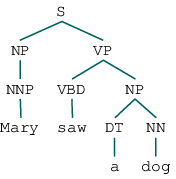

In [ ]:
# Display the tree diagram
def CFG_parse(text):
    tree = Tree.fromstring(list(nlp(text).sents)[0]._.parse_string)
    IPython.core.display.display(tree)

CFG_parse("Mary saw a dog")

### Exercise 2
Write a `CFG_parse(sentence)` function to parse the sentence "He hit the man with a hat". You may modify the CFG_parse function above.



In [ ]:
# YOUR CODE HERE

def CFG_parse(sentence):
    # Grammar with only one rule
    grammar1 = nltk.CFG.fromstring("""
    S -> NP VP
    VP -> V NP | V NP PP
    NP -> Pro | Det N | Det N PP
    PP -> P NP
    V -> "hit"
    Det -> "a" | "the"
    N -> "man" | "hat"
    Pro -> "He"
    P -> "with"
    """)
    rd_parser = nltk.RecursiveDescentParser(grammar1)
    sent = sentence.split() # create a chunk parser using this grammar
    for tree in rd_parser.parse(sent):
        print (tree)
        return tree

cp = CFG_parse('He hit the man with a hat') # already tokenised sentences
# print(cp.draw())

(S
  (NP (Pro He))
  (VP
    (V hit)
    (NP (Det the) (N man) (PP (P with) (NP (Det a) (N hat))))))
None


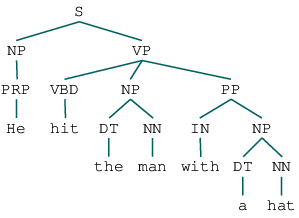

In [ ]:
# Display the tree diagram
def CFG_parse(text):
    tree = Tree.fromstring(list(nlp(text).sents)[0]._.parse_string)
    IPython.core.display.display(tree)

CFG_parse("He hit the man with a hat")

## Dependency Parsing

In [ ]:
# Based on dependency grammar rules to detect linguistic phrases

def dependency_parse(sentence):
    groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
    'shot' -> 'I' | 'elephant' | 'in'
    'elephant' -> 'an' | 'in'
    'in' -> 'pajamas'
    'pajamas' -> 'my'
    """)
    dp_parser = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
    sent = sentence.split() 
    trees = dp_parser.parse(sent)
    for tree in trees:
        print (tree)
        return tree
     

dp = dependency_parse('I shot an elephant in my pajamas')
#print(dp.draw())

(shot I (elephant an (in (pajamas my))))


In [ ]:
def dependency_parse(text):
    displacy.render(nlp(text),jupyter=True)

dependency_parse("I shot an elephant in my pajamas")

/Users/oksder/opt/anaconda3/lib/python3.7/site-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


### Exercise 3
Write a `dependency_parse(sentence)` function to parse the sentence "He hit the man with a hat". You may modify the dependency_parse function above.

In [ ]:
# YOUR CODE HERE

def dependency_parse(sentence):
    groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
    'hit' -> 'He' | 'man' | 'with'
    'man' -> 'the' | 'with'
    'with' -> 'hat'
    'hat' -> 'a'
    """)
    dp_parser = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
    sent = sentence.split() # create a chunk parser using this grammar
    trees = dp_parser.parse(sent)
    for tree in trees:
        print (tree)
        #print(tree.draw())
        return tree
     

dp = dependency_parse('He hit the man with a hat')
# print(dp.draw())

(hit He (man the (with (hat a))))


In [ ]:
def dependency_parse(text):
    displacy.render(nlp(text),jupyter=True)

dependency_parse("He hit the man with a hat")

# Pen & Paper Exercises
## Computing Probabilities

### Exercise 5

Using given values, build a PCFG for the sentence *\"Astronomers saw stars with ears\"*. Provide at least 2 parse trees for the sentence and show which one has the highest probability.

S  → NP VP 1.0 

NP → NP PP 0.4

NP → N 0.6

PP → P NP 1.0

N → Astronomers 0.2

N → ears 0.25

N → saw 0.1

N → stars 0.25

N → telescopes 0.2

VP → V NP 0.7 

VP → VP PP 0.3

P → with 1.0 

V → saw 1.0 




### Probability count for Tree 1

S  → NP VP 1.0 

NP  → N 0.6

N → Astronomers 0.2

VP → V NP 0.7 

V → saw 1.0

NP → NP PP 0.4

NP → N 0.6

N → stars 0.25

PP → P NP 1.0

P → with 1.0 

NP → N 0.6

N → ears 0.25

![](https://drive.google.com/uc?export=view&id=1uv4nbpmta8UEcMPsTEfxVJnGhHwpKuB-)


Probability = **0.000756**



### Probability count for Tree 2

S → NP VP 1.0

NP → N 0.6

N → Astronomers 0.2

VP → VP PP 0.3

VP → V NP 0.7

NP → N 0.6

V → saw 1.0

N → stars 0.25

PP → P NP 1.0

P → with 1.0

NP → N 0.6

N → ears 0.25

![](https://drive.google.com/uc?export=view&id=1eyjm72HKGvhheT9sfctfZjMSTi4023Bx)

**Probability = 0.000567**




#### NLTK solution

(S
  (NP (N Astronomers))
  (VP
    (V saw)
    (NP (NP (N stars)) (PP (P with) (NP (N ears)))))) (p=0.000756)


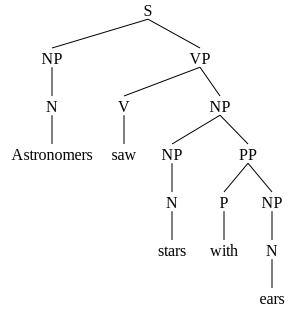

In [ ]:
from nltk import PCFG

pcfg1 = PCFG.fromstring("""
    S -> NP VP [1.0]
    NP -> NP PP [0.4] | N [0.6]
    PP -> P NP [1.0]
    N -> 'Astronomers' [0.2] | 'ears' [0.25] | 'saw' [0.1] | 'stars' [0.25] | 'telescopes' [0.2]
    VP -> V NP [0.7] | VP PP [0.3]
    P -> 'with' [1.0]
    V -> 'saw' [1.0] 
""")

def pcfg_parse(sentence, grammar):
    pcfg_parser = nltk.pchart.InsideChartParser(grammar)
    sent = sentence.split() 
    for tree in pcfg_parser.parse(sent):
        print(tree)
        return tree

pcfg_parse("Astronomers saw stars with ears", pcfg1)

### Exercise 5 

Lets' now convert our grammar to **Chomsky Normal Form (CNF)**. A context free grammar (CFG) is in CNF if all production rules satisfy one of the following conditions:

* A non-terminal generating a terminal (X  → w)
* A non-terminal generating two non-terminals (X  → YZ)

Rewrite the CFG provided in **Exercise** 4 and both trees you induced with it.

### Rules

**Original CFG**

S → NP VP 

NP → NP PP | N 

PP → P NP

N → Astronomers | ears | saw | stars | telescopes

VP → V NP  | VP PP 

P → with

V → saw

**CNF**

S → NP VP 

NP → NP PP | Astronomers | ears | saw | stars | telescopes 

PP → P NP

VP → V NP  | VP PP 

P → with

V → saw


What we did is basically eliminating the production rule `NP → N`, because it contradicts CNF requirements, and removing the `N` non-terminal symbol from the list of non-terminals. Thus, all the terminals that were produced from the non-terminal `N` before have now "moved up" and are produced from the non-terminal `NP`.

**Probabilities**

|Rule    | Probability | Comment |
|:----------- |:-----------:|:-----------|
|S  → NP VP | 1.0 | |
|NP → NP PP | 0.4 | |
|NP → Astronomers |0.12 |= 0.6 x 0.2|
|NP → ears| 0.15 |= 0.6 x 0.25|
NP → saw | 0.06 |= 0.6 x 0.1|
NP → stars | 0.15 |= 0.6 x 0.25|
NP → telescopes | 0.12 | = 0.6 x 0.2|
PP → P NP | 1.0 | |
VP → V NP | 0.7  | |
VP → VP PP | 0.3 | |
P → with |1.0 | |
V → saw | 1.0  | |

### Tree 1

**Rules**

S → NP VP

NP → Astronomers

VP → V NP

V → saw 

NP → NP PP 

NP → stars 

PP → P NP 

P → with

NP → ears

**Probabilities**

|Rule    | Probability | 
|:----------- |:-----------:|
S  → NP VP | 1.0 | 
NP → Astronomers |0.12 |
VP → V NP | 0.7  | 
V → saw | 1.0  | |
NP → NP PP | 0.4 | 
NP → stars | 0.15 |
PP → P NP | 1.0 | |
P → with |1.0 |
NP → ears| 0.15 |

### Tree 2

**Rules** 

S → NP VP

NP → Astronomers

VP → VP PP

VP → V NP

V → saw 

NP → stars

PP → P NP

P → with

NP → ears

**Probabilities**

|Rule    | Probability | 
|:----------- |:-----------:|
S  → NP VP | 1.0 | 
NP → Astronomers |0.12 |
VP → VP PP | 0.3 |
VP → V NP | 0.7  | 
V → saw | 1.0  | |
NP → stars | 0.15 |
NP → NP PP | 0.4 | 
PP → P NP | 1.0 | |
P → with |1.0 |
NP → ears| 0.15 |


### Exercise 6

Draw a CYK algorithm chart for the sentence *\"Astronomers saw stars with ears\"* using the PCFG in CNF you created above.

 ![](https://drive.google.com/uc?export=view&id=1S4j3FpL_K2cb4MRk3yvTYaWAxTqo3mVB)

 You can create an animated version [here](http://lxmls.it.pt/2015/cky.html) to see how the algorithm works.